In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class DiscreteUniformRV:
    def __init__(self, a = 0, b = 1):
        self.low = a
        self.high = b
        
    def draw(self, n_samples):
        samples = np.random.randint(self.low, self.high, n_samples)
        return samples

In [3]:
AugenzahlWuerfel = DiscreteUniformRV(1, 6)
AugenzahlWuerfel.draw(10)

array([4, 5, 1, 1, 1, 2, 5, 2, 2, 5])

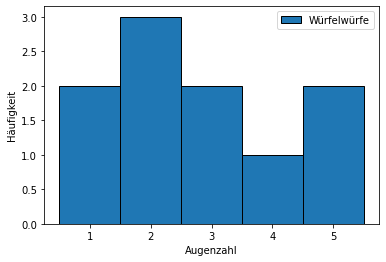

In [4]:
plt.hist(AugenzahlWuerfel.draw(10), bins = [1, 2, 3, 4, 5, 6], edgecolor = "black", align = "left")
plt.xlabel("Augenzahl")
plt.ylabel("Häufigkeit")
plt.legend(["Würfelwürfe"]);

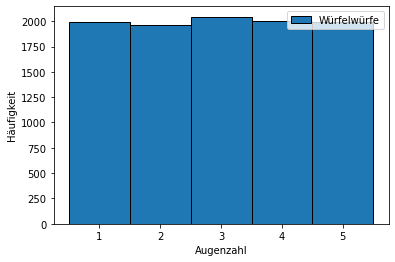

In [5]:
plt.hist(AugenzahlWuerfel.draw(10000), bins = [1, 2, 3, 4, 5, 6], edgecolor = "black", align = "left")
plt.xlabel("Augenzahl")
plt.ylabel("Häufigkeit")
plt.legend(["Würfelwürfe"]);

In [103]:
def plot_pmf_and_cdf(RV, values, probs, cumul_probs):
    plt.figure(figsize = (16, 4))

    plt.subplot(1, 2, 1)
    plt.plot(values, probs, "bo")
    plt.vlines(values, 0, probs, "b")
    plt.ylim(0, 1)
    plt.ylabel("Wahrscheinlichkeit")
    plt.xlabel("Wert")
    plt.title("Probability Mass Function")
    plt.xticks(values, values);

    plt.subplot(1, 2, 2)
    plt.plot(values, cumul_probs, "bo")
    plt.vlines(values, 0, cumul_probs, "b")
    plt.xlim(min(values) - 1, max(values) + 1)
    plt.ylabel("Kumulierte Wahrscheinlichkeit")
    plt.xlabel("Wert")
    plt.title("Cumulative Distribution Function")
    plt.xticks(values, values);

    plt.tight_layout();

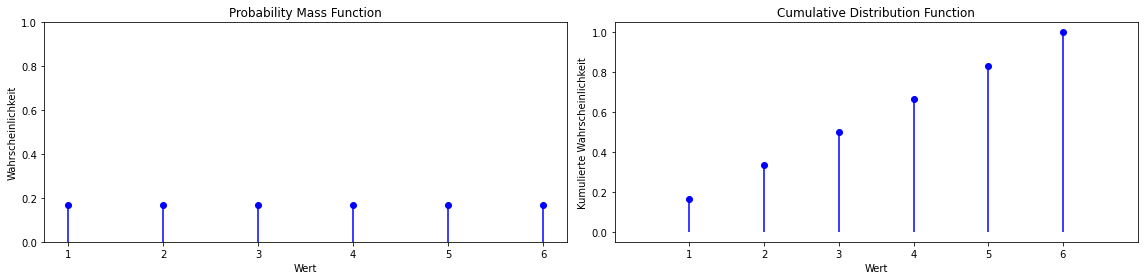

In [104]:
a = 1
b = 6

DiscUnif = DiscreteUniformRV(a, b)
values_disc_unif = [i for i in range(DiscUnif.low, DiscUnif.high + 1)]
probs_disc_unif = [1/len(values_disc_unif) for value in values_disc_unif]
cumul_probs_disc_unif = [sum(probs_disc_unif[:i]) for i in range(1, len(probs_disc_unif) + 1)]

plot_pmf_and_cdf(DiscUnif, values_disc_unif, probs_disc_unif, cumul_probs_disc_unif)

In [105]:
class BinomialRV:
    def __init__(self, n_trials = 10, p = 0.5):
        self.n_trials = n_trials
        self.p = p
        
    def draw(self, n_samples):
        samples = np.random.binomial(self.n_trials, self.p, n_samples)
        return samples

In [106]:
AnzahlKopf = BinomialRV(10, 0.5)
AnzahlKopf.draw(10)

array([5, 4, 2, 6, 5, 7, 6, 6, 4, 8])

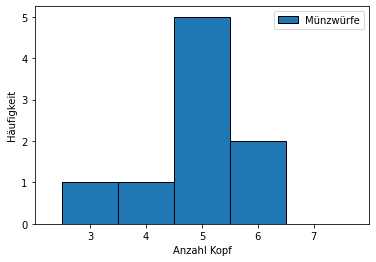

In [107]:
sample = AnzahlKopf.draw(10)

sample_range = [i for i in range(min(sample), max(sample))]
plt.hist(sample, bins = sample_range, edgecolor = "black", align = "left")
plt.xlabel("Anzahl Kopf")
plt.ylabel("Häufigkeit")
plt.xticks(sample_range)
plt.xlim(min(sample_range) - 1, max(sample_range) + 1)
plt.legend(["Münzwürfe"]);

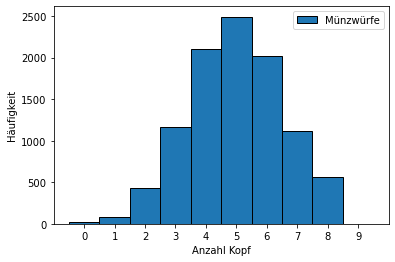

In [108]:
sample = AnzahlKopf.draw(10000)

sample_range = [i for i in range(min(sample), max(sample))]
plt.hist(sample, bins = sample_range, edgecolor = "black", align = "left")
plt.xlabel("Anzahl Kopf")
plt.ylabel("Häufigkeit")
plt.xticks(sample_range)
plt.xlim(min(sample_range) - 1, max(sample_range) + 1)
plt.legend(["Münzwürfe"]);

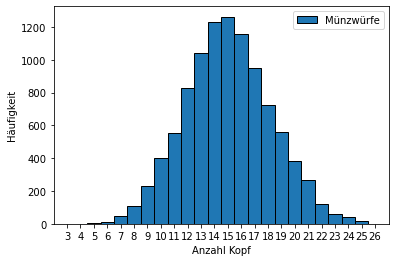

In [109]:
AnzahlKopf = BinomialRV(50, 0.3)

sample = AnzahlKopf.draw(10000)

sample_range = [i for i in range(min(sample), max(sample))]
plt.hist(sample, bins = sample_range, edgecolor = "black", align = "left")
plt.xlabel("Anzahl Kopf")
plt.ylabel("Häufigkeit")
plt.xticks(sample_range)
plt.xlim(min(sample_range) - 1, max(sample_range) + 1)
plt.legend(["Münzwürfe"]);

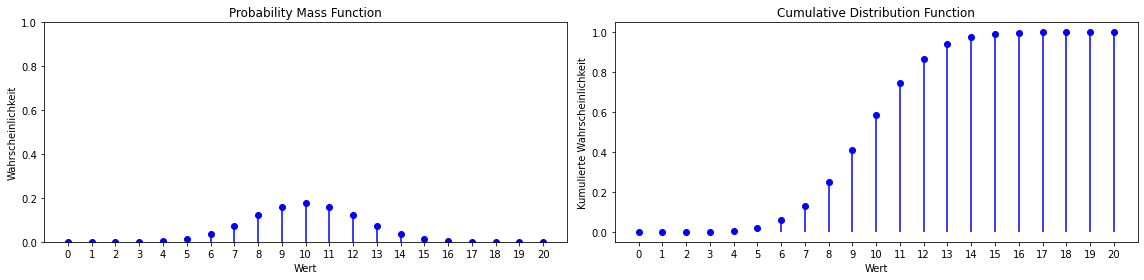

In [112]:
import scipy.special

Binom = BinomialRV(20, 0.5)

values_binom = [i for i in range(0, Binom.n_trials + 1)]
probs_binom = [scipy.special.binom(Binom.n_trials, i)*Binom.p**(i)*(1-Binom.p)**(Binom.n_trials - i) for i in range(len(values_binom))]
cumul_probs_binom = [sum(probs_binom[:i]) for i in range(1, len(probs_binom) + 1)]

plot_pmf_and_cdf(DiscUnif, values_binom, probs_binom, cumul_probs_binom)